In [ ]:
%pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="oSq21nk6YA7JS80deVrH")
project = rf.workspace("project-hv5yx").project("computer_vision-5nx0j")
version = project.version(1)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Computer_Vision-1 in yolov8-obb:: 100%|██████████| 9418/9418 [00:01<00:00, 4905.34it/s]


In [ ]:
import os

def update_first_number_to_zero(input_folder, output_folder):
    """
    Updates only the first number (class ID) in each line of YOLO label files to 0.

    Parameters:
        input_folder (str): Path to folder containing YOLO label files.
        output_folder (str): Path to save updated label files.
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each file in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".txt"):  # Process only .txt files
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name)

            with open(input_path, "r") as infile, open(output_path, "w") as outfile:
                for line in infile:
                    parts = line.strip().split()  # Split line into components
                    if len(parts) > 0:
                        parts[0] = '0'  # Change the first number (class ID) to 0
                        new_line = " ".join(parts)  # Reassemble the line
                        outfile.write(new_line + "\n")  # Write updated line to output file

    print("First number (class IDs) updated to 0 and saved to:", output_folder)

# Example usage
input_folder = "Computer_Vision-1/valid/labelss"  # Replace with your input folder path
output_folder = "Computer_Vision-1/valid/labels"  # Replace with your output folder path
update_first_number_to_zero(input_folder, output_folder)

First number (class IDs) updated to 0 and saved to: Computer_Vision-1/valid/labels


In [ ]:
import os

def update_first_number_to_zero(input_folder, output_folder):
    """
    Updates only the first number (class ID) in each line of YOLO label files to 0.

    Parameters:
        input_folder (str): Path to folder containing YOLO label files.
        output_folder (str): Path to save updated label files.
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each file in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".txt"):  # Process only .txt files
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name)

            with open(input_path, "r") as infile, open(output_path, "w") as outfile:
                for line in infile:
                    parts = line.strip().split()  # Split line into components
                    if len(parts) > 0:
                        parts[0] = '0'  # Change the first number (class ID) to 0
                        new_line = " ".join(parts)  # Reassemble the line
                        outfile.write(new_line + "\n")  # Write updated line to output file

    print("First number (class IDs) updated to 0 and saved to:", output_folder)

# Example usage
input_folder = "Computer_Vision-1/train/labelss"  # Replace with your input folder path
output_folder = "Computer_Vision-1/train/labels"  # Replace with your output folder path
update_first_number_to_zero(input_folder, output_folder)

First number (class IDs) updated to 0 and saved to: Computer_Vision-1/train/labels


In [ ]:
import os

def update_first_number_to_zero(input_folder, output_folder):
    """
    Updates only the first number (class ID) in each line of YOLO label files to 0.

    Parameters:
        input_folder (str): Path to folder containing YOLO label files.
        output_folder (str): Path to save updated label files.
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each file in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".txt"):  # Process only .txt files
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name)

            with open(input_path, "r") as infile, open(output_path, "w") as outfile:
                for line in infile:
                    parts = line.strip().split()  # Split line into components
                    if len(parts) > 0:
                        parts[0] = '0'  # Change the first number (class ID) to 0
                        new_line = " ".join(parts)  # Reassemble the line
                        outfile.write(new_line + "\n")  # Write updated line to output file

    print("First number (class IDs) updated to 0 and saved to:", output_folder)

# Example usage
input_folder = "Computer_Vision-1/test/labelss"  # Replace with your input folder path
output_folder = "Computer_Vision-1/test/labels"  # Replace with your output folder path
update_first_number_to_zero(input_folder, output_folder)

First number (class IDs) updated to 0 and saved to: Computer_Vision-1/test/labels


In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 24.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Step 1: Load the YOLOv8 model (you can choose different versions based on your needs)
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' is the nano model, use 'yolov8s.pt', 'yolov8m.pt' etc. for other versions

# Step 2: Train the model
results = model.train(
    data='Computer_Vision-1/data.yaml',  # Updated path to data.yaml
    epochs=50,             # Set the number of epochs for training
    imgsz=640,             # Image size (typically 640x640)
    batch=32,              # Batch size (adjust based on your GPU memory)
    device=0,              # Use GPU (0 means first GPU, set to -1 if using CPU)
    workers=4,             # Number of workers for data loading (increase for faster loading)
    name='yolov8_training' # Name of the training run (saved in the "runs" folder)
)

# Step 3: Evaluate the model on the test set
metrics = model.val(data='Computer_Vision-1/data.yaml', split='test')  # Evaluate the test set if available

# # Print evaluation metrics
# if metrics:
#     precision = metrics.get('precision', 'N/A')
#     recall = metrics.get('recall', 'N/A')
#     map50 = metrics.get('map50', 'N/A')
#     map_5095 = metrics.get('map', 'N/A')
#     # Assume accuracy can be approximated as the harmonic mean of precision and recall
#     accuracy = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"mAP@0.5: {map50:.4f}")
#     print(f"mAP@0.5:0.95: {map_5095:.4f}")
#     print(f"Accuracy (approximated): {accuracy:.4f}")
# else:
#     print("No evaluation metrics available.")

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Computer_Vision-1/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=yolov8_training2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning /content/Computer_Vision-1/train/labels.cache... 4116 images, 9 backgrounds, 17 corrupt: 100%|██████████| 4116/4116 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f12_kn_g3_8_jpg.rf.04a438b9f579f07f60f7dd4b3481d112.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0003      1.0316]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f12_kn_g3_8_jpg.rf.e61978f1b7d4584d8127a9c02b0a3a00.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0212]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f13_kn_g3_7_jpg.rf.07ec0f358241c09a08e8ac9c50fefb8f.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0684]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f13_kn_g3_7_jpg.rf.d470fc80c15e20b54f9250799d988d73.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.082]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f14_kn_g3_2_jpg.rf.30b40e101e45d37fa09f2cee6db3933e.jpg: ignoring corrupt image/label: non-normalized or out of bounds

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Computer_Vision-1/valid/labels.cache... 391 images, 0 backgrounds, 1 corrupt: 100%|██████████| 391/391 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/Computer_Vision-1/valid/images/f5_kn_g3_3_jpg.rf.ed600f13893cd485ce07b10f71cf8cdf.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0294]


Plotting labels to runs/detect/yolov8_training2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_training2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.75G      1.782      2.177      1.586          9        640: 100%|██████████| 129/129 [01:30<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]


                   all        390       1022      0.569        0.5      0.501      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.23G      1.732      1.701      1.533         19        640: 100%|██████████| 129/129 [01:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


                   all        390       1022      0.684      0.531      0.585      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.21G       1.72       1.58      1.529         18        640: 100%|██████████| 129/129 [01:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


                   all        390       1022      0.655      0.556      0.593      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.2G      1.715      1.547      1.533         16        640: 100%|██████████| 129/129 [01:24<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        390       1022      0.659      0.588      0.627      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.19G      1.663      1.468      1.504         16        640: 100%|██████████| 129/129 [01:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]


                   all        390       1022      0.515      0.372      0.357       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       4.2G      1.638      1.438      1.498         24        640: 100%|██████████| 129/129 [01:22<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]


                   all        390       1022       0.74      0.656      0.714      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.26G      1.614      1.364      1.475         19        640: 100%|██████████| 129/129 [01:26<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        390       1022      0.752      0.641      0.709      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.22G      1.589      1.346      1.452         15        640: 100%|██████████| 129/129 [01:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


                   all        390       1022      0.767      0.666      0.733      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.19G      1.583      1.325      1.449         14        640: 100%|██████████| 129/129 [01:24<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


                   all        390       1022      0.774       0.62      0.697      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.22G      1.564      1.289      1.446         15        640: 100%|██████████| 129/129 [01:28<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        390       1022      0.783      0.634      0.725      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.19G      1.547       1.25      1.434         11        640: 100%|██████████| 129/129 [01:25<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        390       1022      0.831      0.666      0.764      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.25G      1.539      1.238      1.422         11        640: 100%|██████████| 129/129 [01:25<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        390       1022      0.824      0.667      0.764      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.18G      1.519       1.22      1.403         25        640: 100%|██████████| 129/129 [01:26<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        390       1022      0.817      0.668      0.763      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.21G      1.518      1.202      1.396         27        640: 100%|██████████| 129/129 [01:27<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        390       1022       0.81      0.693      0.777      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.24G      1.513      1.191      1.397         12        640: 100%|██████████| 129/129 [01:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        390       1022      0.815      0.711      0.774      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.26G      1.504      1.155      1.395          8        640: 100%|██████████| 129/129 [01:22<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]

                   all        390       1022      0.824      0.686      0.762      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.19G      1.483      1.151      1.378         17        640: 100%|██████████| 129/129 [01:26<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


                   all        390       1022      0.791        0.7      0.764      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.15G       1.47      1.134      1.376         13        640: 100%|██████████| 129/129 [01:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


                   all        390       1022      0.846      0.686      0.783      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.19G      1.478      1.117      1.373          5        640: 100%|██████████| 129/129 [01:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


                   all        390       1022      0.826      0.727      0.793      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.23G      1.472      1.121      1.372         14        640: 100%|██████████| 129/129 [01:25<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        390       1022      0.845      0.718      0.799      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.2G      1.459      1.084      1.357         13        640: 100%|██████████| 129/129 [01:21<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


                   all        390       1022      0.877      0.687       0.79      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.32G      1.449      1.088       1.35          4        640: 100%|██████████| 129/129 [01:21<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        390       1022      0.833      0.715      0.795      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.2G      1.439      1.071      1.347         13        640: 100%|██████████| 129/129 [01:25<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


                   all        390       1022      0.832      0.705      0.786      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       4.2G      1.428      1.059      1.339         22        640: 100%|██████████| 129/129 [01:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        390       1022      0.833      0.697      0.774      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       4.2G      1.414      1.048      1.325         32        640: 100%|██████████| 129/129 [01:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]


                   all        390       1022      0.823      0.731      0.801      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.26G      1.419      1.039      1.324         15        640: 100%|██████████| 129/129 [01:28<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        390       1022      0.841      0.721      0.793      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.14G      1.405      1.026       1.32          4        640: 100%|██████████| 129/129 [01:25<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        390       1022      0.825      0.721       0.79      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.2G      1.417      1.019      1.335          6        640: 100%|██████████| 129/129 [01:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]


                   all        390       1022      0.861      0.708      0.803      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       4.2G      1.399     0.9917      1.319         19        640: 100%|██████████| 129/129 [01:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]


                   all        390       1022      0.843      0.732      0.813      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.2G      1.396     0.9969      1.316         23        640: 100%|██████████| 129/129 [01:27<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


                   all        390       1022      0.848      0.717      0.802      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.28G      1.386     0.9861       1.31         10        640: 100%|██████████| 129/129 [01:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]


                   all        390       1022      0.824      0.734      0.801      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.19G      1.371     0.9769      1.303          7        640: 100%|██████████| 129/129 [01:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        390       1022      0.877      0.715      0.808      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.2G      1.372     0.9632      1.303         18        640: 100%|██████████| 129/129 [01:26<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


                   all        390       1022      0.804      0.747      0.792      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.19G      1.362     0.9693      1.301          4        640: 100%|██████████| 129/129 [01:25<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        390       1022      0.864      0.711      0.807      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.29G      1.358     0.9552      1.291         16        640: 100%|██████████| 129/129 [01:26<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        390       1022      0.849      0.738      0.805      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.32G      1.345     0.9384      1.284         15        640: 100%|██████████| 129/129 [01:28<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        390       1022       0.89      0.721      0.816      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.27G      1.348     0.9311      1.287         16        640: 100%|██████████| 129/129 [01:25<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        390       1022       0.87      0.728      0.804      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.21G      1.337     0.9235      1.277         16        640: 100%|██████████| 129/129 [01:26<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        390       1022      0.862      0.747      0.811      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.2G      1.334     0.9214      1.271         28        640: 100%|██████████| 129/129 [01:25<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        390       1022      0.859      0.723      0.804      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.2G      1.334     0.9119      1.281         14        640: 100%|██████████| 129/129 [01:28<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        390       1022      0.851      0.747       0.81      0.526


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.27G      1.234     0.7257      1.215         13        640: 100%|██████████| 129/129 [01:17<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]


                   all        390       1022       0.87      0.745      0.816       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.15G      1.216     0.7078      1.201         12        640: 100%|██████████| 129/129 [01:14<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        390       1022      0.885      0.743      0.814      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.14G      1.207     0.6981      1.198         16        640: 100%|██████████| 129/129 [01:17<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        390       1022      0.905      0.742      0.821      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.12G      1.197     0.6811      1.189          8        640: 100%|██████████| 129/129 [01:15<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]


                   all        390       1022      0.882       0.75      0.815      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.14G      1.182     0.6732      1.182         15        640: 100%|██████████| 129/129 [01:15<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        390       1022      0.874      0.727      0.815      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.15G      1.169     0.6661      1.181         10        640: 100%|██████████| 129/129 [01:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        390       1022      0.905      0.725      0.822      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.14G      1.155     0.6518      1.165          4        640: 100%|██████████| 129/129 [01:16<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


                   all        390       1022      0.896      0.741      0.821      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.15G      1.149     0.6502      1.165          5        640: 100%|██████████| 129/129 [01:13<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        390       1022      0.889      0.745       0.82      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.19G      1.141     0.6399      1.154          7        640: 100%|██████████| 129/129 [01:16<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


                   all        390       1022      0.895      0.735      0.822      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.12G      1.133     0.6369      1.154         10        640: 100%|██████████| 129/129 [01:16<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


                   all        390       1022      0.908      0.731      0.822      0.542

50 epochs completed in 1.243 hours.
Optimizer stripped from runs/detect/yolov8_training2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_training2/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_training2/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


                   all        390       1022       0.91      0.732      0.822      0.541
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/yolov8_training2
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Computer_Vision-1/test/labels... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<00:00, 769.72it/s]

val: New cache created: /content/Computer_Vision-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]


                   all        196        489      0.918       0.72      0.819      0.533
Speed: 0.4ms preprocess, 5.8ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/yolov8_training22


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Computer_Vision-1/test/labels.cache... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]


                   all        196        489      0.918       0.72      0.819      0.533
Speed: 0.5ms preprocess, 4.8ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/yolov8_training23
Model Evaluation Metrics:
Precision: 0.5327
Recall: 0.5327
mAP@0.5: 0.8185
mAP@0.5:0.95: 0.5327
Average IoU: 0.8185


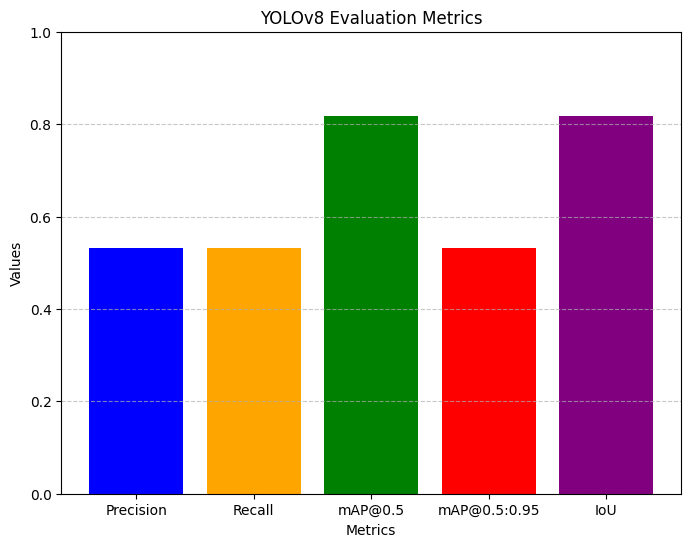

In [ ]:
from matplotlib import pyplot as plt

# Step 3: Evaluate the model on the test set
metrics = model.val(data='Computer_Vision-1/data.yaml', split='test')  # Evaluate the test set if available
if metrics:
    # Access metrics through the 'box' attribute
    precision = metrics.box.maps[0]  # Precision (mAP@0.5) for class 0
    recall = metrics.box.maps[0]    # Recall (mAP@0.5) for class 0
    map50 = metrics.box.map50       # Access map50 directly
    map_5095 = metrics.box.map       # Access map_5095 (mAP@0.5:0.95) directly
    # iou = metrics.box.maps[0.5]  # Access IoU (mAP@0.5) - This line caused the error
    iou = metrics.box.map50 # IoU is usually represented by mAP@0.5 in YOLOv8

    # Print metrics
    print("Model Evaluation Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"mAP@0.5: {map50:.4f}")
    print(f"mAP@0.5:0.95: {map_5095:.4f}")
    print(f"Average IoU: {iou:.4f}")

    # ... (rest of your code)

    # Step 4: Plot the metrics
    metric_names = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95', 'IoU']
    metric_values = [precision, recall, map50, map_5095, iou]

    plt.figure(figsize=(8, 6))
    plt.bar(metric_names, metric_values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.ylim(0, 1)  # Metrics are between 0 and 1
    plt.title('YOLOv8 Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No evaluation metrics available.")


image 1/1 /content/Computer_Vision-1/test/images/f11_kl_g3_7_jpg.rf.4b139004289fa68abf51c35f454292ce.jpg: 640x640 4 KhSTs, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


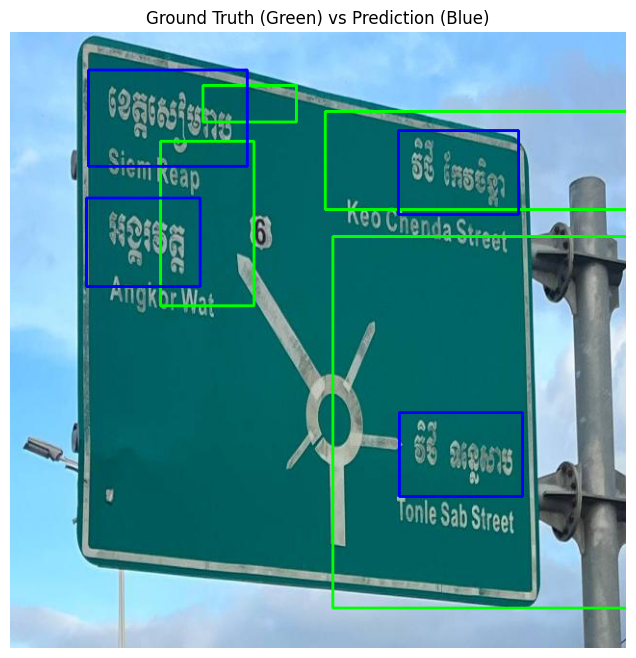

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model = YOLO('/content/runs/detect/yolov8_training2/weights/best.pt')  # Replace 'best.pt' with your model checkpoint file

# Path to your test dataset image
test_image_path = '/content/Computer_Vision-1/test/images/f11_kl_g3_7_jpg.rf.4b139004289fa68abf51c35f454292ce.jpg'  # Replace with the path to one test image

# Run inference to get predictions
results = model(test_image_path)  # Perform inference on the image

# Load the ground truth bounding boxes from the dataset
import yaml

# Load the YAML file with dataset details
with open('Computer_Vision-1/data.yaml', 'r') as f:
    data_yaml = yaml.safe_load(f)

# Ground truth annotation file path
label_path = test_image_path.replace('images', 'labels').replace('.jpg', '.txt')

# Read the ground truth bounding boxes
# Read the ground truth bounding boxes
ground_truth_boxes = []
with open(label_path, 'r') as f:
    for line in f.readlines():
        values = line.split()  # Split the line into values
        if len(values) >= 5:   # Ensure there are at least 5 values
            class_id, x_center, y_center, width, height = map(float, values[:5])
            ground_truth_boxes.append((class_id, x_center, y_center, width, height))

# Load the image
image = cv2.imread(test_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw ground truth bounding boxes
for box in ground_truth_boxes:
    class_id, x_center, y_center, width, height = box
    # Convert YOLO format (normalized) to pixel format
    h, w, _ = image.shape
    x1 = int((x_center - width / 2) * w)
    y1 = int((y_center - height / 2) * h)
    x2 = int((x_center + width / 2) * w)
    y2 = int((y_center + height / 2) * h)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for ground truth

# Draw predicted bounding boxes
for r in results:
    for box in r.boxes.xyxy:  # Predictions in (x1, y1, x2, y2) format
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Blue for predictions

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title('Ground Truth (Green) vs Prediction (Blue)')
plt.axis('off')
plt.show()


In [ ]:
input_file = '/content/Computer_Vision-1/valid/labelss/f12_kn_g3_2_jpg.rf.0173eb6479c4363973c0b40baf0edf22.txt'  # Replace with your file path
output_file = 'cleaned_ground_truth.txt'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        parts = line.split()
        if len(parts) >= 5:
            outfile.write(' '.join(parts[:5]) + '\n')  # Write only the first 5 values


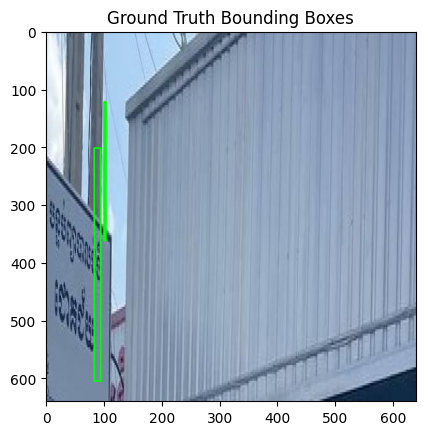

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = '/content/Computer_Vision-1/valid/images/f12_kn_g3_2_jpg.rf.0173eb6479c4363973c0b40baf0edf22.jpg'  # Replace with the path to one test image
label_path = 'cleaned_ground_truth.txt'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# import cv2
# import matplotlib.pyplot as plt

# # Load image
# image_path = 'path_to_image.jpg'
# label_path = 'path_to_label.txt'
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read ground truth labels
with open(label_path, 'r') as f:
    for line in f.readlines():
        parts = line.split()  # Split line into parts
        if len(parts) < 5:  # Skip invalid lines
            continue
        class_id, x_center, y_center, width, height = map(float, parts[:5])  # Read first 5 values

        # Convert YOLO format (normalized) to pixel values
        h, w, _ = image.shape
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        # Draw ground truth box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)


# Plot the image
plt.imshow(image)
plt.title("Ground Truth Bounding Boxes")
plt.show()


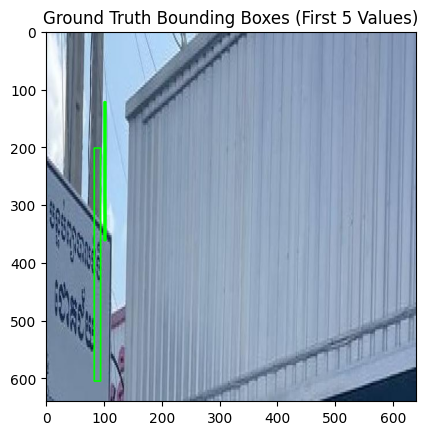

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = '/content/Computer_Vision-1/valid/images/f12_kn_g3_2_jpg.rf.0173eb6479c4363973c0b40baf0edf22.jpg'  # Replace with the path to one test image
label_path = '/content/Computer_Vision-1/valid/labelss/f12_kn_g3_2_jpg.rf.0173eb6479c4363973c0b40baf0edf22.txt'

# Read image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read ground truth labels and process only the first 5 values
with open(label_path, 'r') as f:
    for line in f.readlines():
        # Extract the first 5 values (class_id, x_center, y_center, width, height)
        values = line.split()
        class_id, x_center, y_center, width, height = map(float, values[:5])

        # Convert YOLO format (normalized) to pixel values
        h, w, _ = image.shape
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        # Draw the ground truth bounding box in green (only first 5 values)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color for ground truth

# Plot the image with the bounding box
plt.imshow(image)
plt.title("Ground Truth Bounding Boxes (First 5 Values)")
plt.show()


Skipping incomplete data at index 5 in line: 0 0.15965890359995832 0.3789519268896737 0.004878048437500048 0.37575757499999995 -0.0019353270374582177 0.7058965574853262 0.15284552812500007 0.709090909375

Skipping incomplete data at index 5 in line: 0 0.13896050744888774 0.6313858088633351 0.017669394740459837 0.6303010909731932 0.015294252916572234 0.8958849789848584 0.13658536562500015 0.8969696968750002 


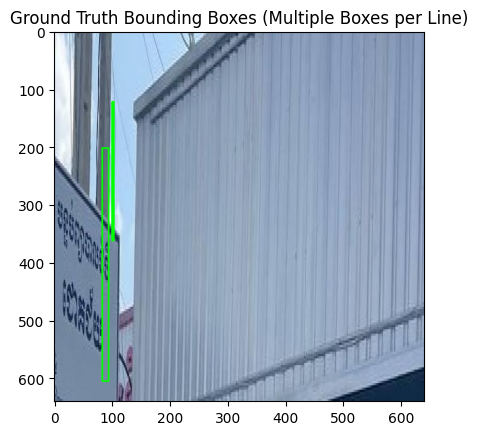

In [ ]:
# Read ground truth labels and process all values
with open(label_path, 'r') as f:
    for line in f.readlines():
        values = line.split()

        # Iterate through sets of 5 values (for multiple bounding boxes per line)
        for i in range(0, len(values), 5):
            # Check if enough values are available before unpacking
            if i + 5 <= len(values):  # Ensure there are at least 5 values left
                class_id, x_center, y_center, width, height = map(float, values[i:i+5])

                # Convert YOLO format (normalized) to pixel values
                h, w, _ = image.shape
                x1 = int((x_center - width / 2) * w)
                y1 = int((y_center - height / 2) * h)
                x2 = int((x_center + width / 2) * w)
                y2 = int((y_center + height / 2) * h)

                # Draw the ground truth bounding box in green
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color for ground truth
            else:
                # Handle cases with fewer than 5 values remaining
                print(f"Skipping incomplete data at index {i} in line: {line}")  # Optional: Print a message

# Display the image
plt.imshow(image)
plt.title("Ground Truth Bounding Boxes (Multiple Boxes per Line)")
plt.show()

Skipping incomplete data at index 5 in line: 0 0.15965890359995832 0.3789519268896737 0.004878048437500048 0.37575757499999995 -0.0019353270374582177 0.7058965574853262 0.15284552812500007 0.709090909375

Skipping incomplete data at index 5 in line: 0 0.13896050744888774 0.6313858088633351 0.017669394740459837 0.6303010909731932 0.015294252916572234 0.8958849789848584 0.13658536562500015 0.8969696968750002 


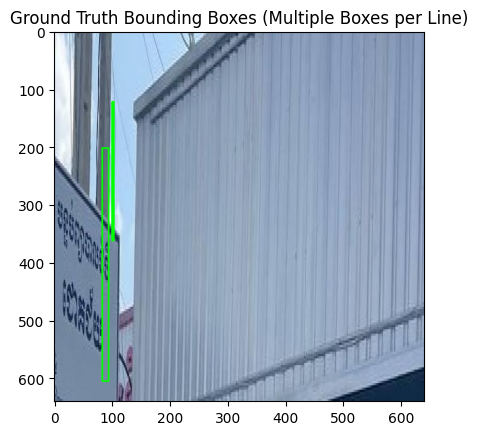

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = '/content/Computer_Vision-1/valid/images/f12_kn_g3_2_jpg.rf.0173eb6479c4363973c0b40baf0edf22.jpg'  # Replace with the path to one test image
label_path = '/content/Computer_Vision-1/valid/labelss/f12_kn_g3_2_jpg.rf.0173eb6479c4363973c0b40baf0edf22.txt'

# Read image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read ground truth labels and process all values
with open(label_path, 'r') as f:
    for line in f.readlines():
        values = line.split()

        # Iterate through sets of 5 values (for multiple bounding boxes per line)
        for i in range(0, len(values), 5):
            class_id, x_center, y_center, width, height = map(float, values[i:i+5])

            # Convert YOLO format (normalized) to pixel values
            h, w, _ = image.shape
            x1 = int((x_center - width / 2) * w)
            y1 = int((y_center - height / 2) * h)
            x2 = int((x_center + width / 2) * w)
            y2 = int((y_center + height / 2) * h)

            # Draw the ground truth bounding box in green
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color for ground truth

# Display the image
plt.imshow(image)
plt.title("Ground Truth Bounding Boxes (Multiple Boxes per Line)")
plt.show()
